# Expectation Maximization in Gaussian Mixture Models



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Generated Dataset

This example assumes a mixture of two normal distributions in one dimension. 

In [2]:
# Generate synthetic data
np.random.seed(42)
data = np.concatenate([np.random.normal(loc=5, scale=1, size=100),
                       np.random.normal(loc=10, scale=2, size=150)])

### Expectation Maximization

The Expectation-Maximization (EM) algorithm iteratively maximizes the likelihood function in the presence of latent variables by alternating between two steps:

    Expectation (E-step): Estimate the values of the latent variables given the observed data and current parameter estimates.

    Maximization (M-step): Update the parameter estimates to maximize the expected log-likelihood obtained from the E-step.

In [3]:
# Function to perform the E-step
def expectation(data, mu, sigma, pi):
    # Compute the posterior probabilities
    likelihood_1 = norm.pdf(data, loc=mu[0], scale=sigma[0])
    likelihood_2 = norm.pdf(data, loc=mu[1], scale=sigma[1])
    weighted_likelihood_1 = pi[0] * likelihood_1
    weighted_likelihood_2 = pi[1] * likelihood_2
    total_weighted_likelihood = weighted_likelihood_1 + weighted_likelihood_2
    posterior_1 = weighted_likelihood_1 / total_weighted_likelihood
    posterior_2 = weighted_likelihood_2 / total_weighted_likelihood
    return posterior_1, posterior_2

# Function to perform the M-step
def maximization(data, posterior_1, posterior_2):
    # Update parameters
    N_1 = np.sum(posterior_1)
    N_2 = np.sum(posterior_2)
    pi = [N_1 / len(data), N_2 / len(data)]
    mu = [np.sum(posterior_1 * data) / N_1, np.sum(posterior_2 * data) / N_2]
    sigma = [np.sqrt(np.sum(posterior_1 * (data - mu[0])**2) / N_1),
             np.sqrt(np.sum(posterior_2 * (data - mu[1])**2) / N_2)]
    return mu, sigma, pi

# Function to fit the model using EM
def fit_em(data, n_iterations=50):
    # Initialize parameters
    mu = [2, 8]
    sigma = [1, 1]
    pi = [0.5, 0.5]

    # Lists to store intermediate values for plotting
    log_likelihoods = []

    # EM iterations
    for iteration in range(n_iterations):
        # E-step
        posterior_1, posterior_2 = expectation(data, mu, sigma, pi)

        # M-step
        mu, sigma, pi = maximization(data, posterior_1, posterior_2)

        # Log-likelihood computation
        log_likelihood = np.sum(np.log(pi[0] * norm.pdf(data, mu[0], sigma[0]) +
                                       pi[1] * norm.pdf(data, mu[1], sigma[1])))
        log_likelihoods.append(log_likelihood)

    return mu, sigma, pi, log_likelihoods

# Fit the model
mu_estimate, sigma_estimate, pi_estimate, log_likelihoods = fit_em(data)

### Plot estimated distributions

The plots show the data histogram, the estimated mixture components, and the log-likelihood over iterations. Adjust the parameters and distributions according to your specific use case.

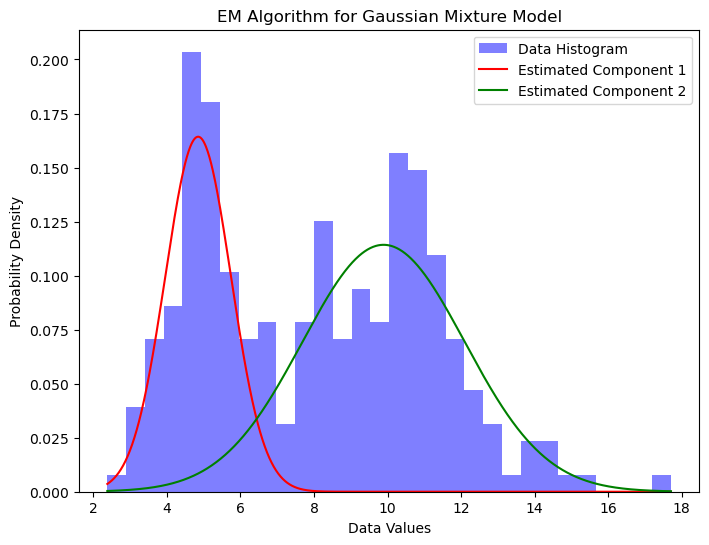

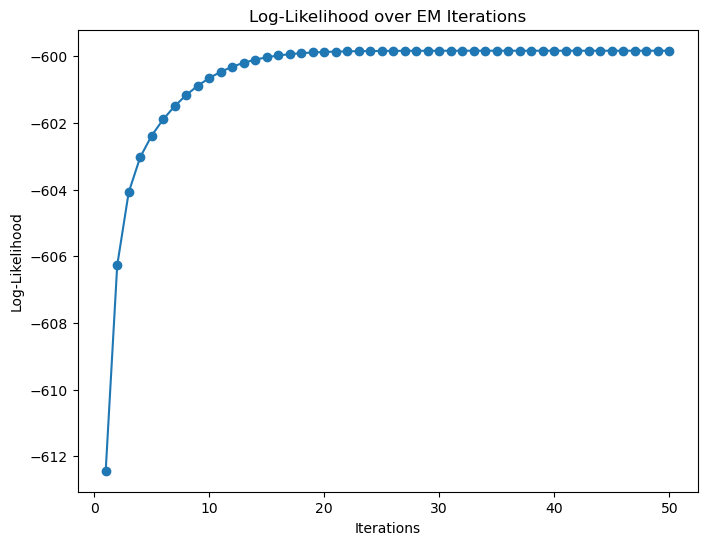

In [4]:
# Plot the data and estimated distributions
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, color='blue', label='Data Histogram')
x_range = np.linspace(min(data), max(data), 1000)
pdf_1 = pi_estimate[0] * norm.pdf(x_range, mu_estimate[0], sigma_estimate[0])
pdf_2 = pi_estimate[1] * norm.pdf(x_range, mu_estimate[1], sigma_estimate[1])
plt.plot(x_range, pdf_1, color='red', label='Estimated Component 1')
plt.plot(x_range, pdf_2, color='green', label='Estimated Component 2')
plt.title('EM Algorithm for Gaussian Mixture Model')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Plot the log-likelihood over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(log_likelihoods) + 1), log_likelihoods, marker='o')
plt.title('Log-Likelihood over EM Iterations')
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.show()